In [226]:
sys.path.append('src/myfitbit')

from src.myfitbit.setup import setup
f = setup()
f

In [255]:
import datetime

#dates = ["2021-06-01", "2021-06-02", "2021-06-03", "2021-06-04", "2021-06-05"]
dates = [d.strftime("%Y-%m-%d") for d in pd.date_range(start='2021-06-01', end='2021-06-15')]
dates

['2021-06-01',
 '2021-06-02',
 '2021-06-03',
 '2021-06-04',
 '2021-06-05',
 '2021-06-06',
 '2021-06-07',
 '2021-06-08',
 '2021-06-09',
 '2021-06-10',
 '2021-06-11',
 '2021-06-12',
 '2021-06-13',
 '2021-06-14',
 '2021-06-15']

In [290]:
import pandas as pd
import time
sys.path.append('src/myfitbit')
from src.myfitbit.heartrate import heartrate

df = heartrate(f, dates)
df

TypeError: heartrate() takes 1 positional argument but 2 were given

<AxesSubplot:xlabel='time'>

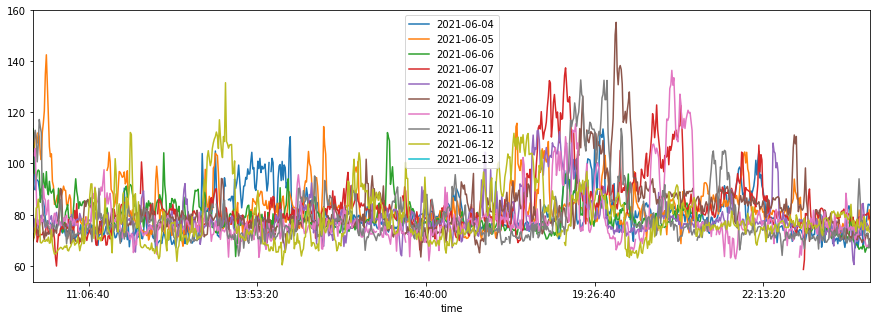

In [257]:
import matplotlib.pyplot as pyplot

df.plot(figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

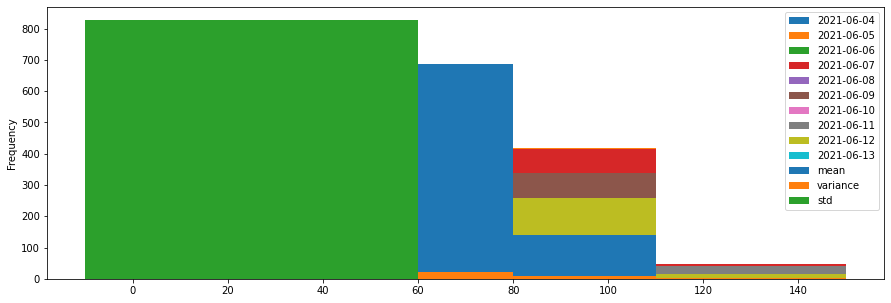

In [285]:
bins_list = [-10, 60, 80, 110, 150]
df.plot.hist(figsize=(15,5), bins=bins_list)

In [279]:
df['mean'] = df.mean(axis=1)
df['std'] = df.std(axis=1)
df

,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,mean,variance,std
time,,,,,,,,,,,,,
0 days 10:12:00,108.600000,106.500000,113.545455,70.375000,79.888889,72.444444,104.111111,107.555556,69.750000,NaN,92.186855,68.601634,18.295015
0 days 10:13:00,102.700000,104.400000,96.250000,71.333333,75.125000,71.142857,103.000000,109.888889,71.714286,NaN,87.201319,49.768250,19.114050
0 days 10:14:00,89.625000,112.200000,96.363636,76.285714,78.375000,74.000000,105.875000,113.000000,73.625000,NaN,88.239856,46.787692,19.791141
0 days 10:15:00,93.500000,110.555556,93.625000,77.111111,77.857143,75.000000,89.444444,109.375000,82.571429,NaN,84.417165,23.512055,23.204147
0 days 10:16:00,93.555556,108.000000,96.666667,69.222222,77.272727,74.000000,76.888889,100.636364,82.750000,NaN,81.655181,25.765309,21.882945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 23:55:00,75.375000,NaN,66.333333,79.714286,76.833333,71.875000,67.600000,72.333333,74.500000,NaN,66.991604,17.801500,17.820724
0 days 23:56:00,80.666667,NaN,67.500000,80.428571,76.400000,72.714286,67.400000,72.400000,73.571429,NaN,67.654917,16.701205,18.524196
0 days 23:57:00,84.000000,78.000000,67.000000,80.666667,75.571429,70.545455,68.142857,72.600000,75.500000,NaN,68.837686,14.697308,18.695887


<AxesSubplot:xlabel='time'>

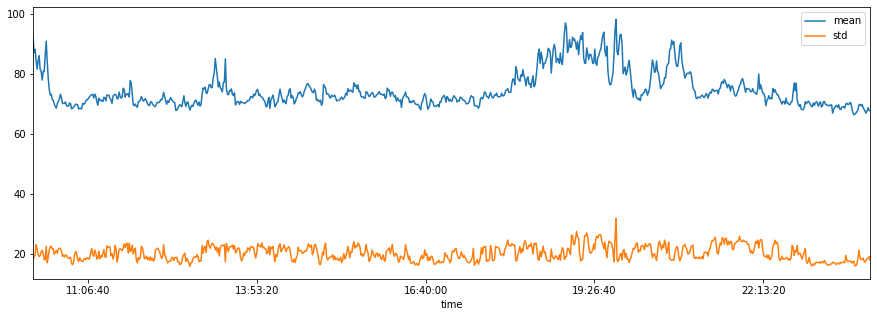

In [280]:
df[["mean","std"]].plot(figsize=(15,5))

In [10]:
import datetime

from google.cloud import bigtable

project = bigtable.Client(project="karanbhatia-dev", admin=True)
instance = client.instance("fitbit")
table = client.table("heartrate")


ModuleNotFoundError: No module named 'google.cloud'

In [259]:
# customary imports
import numpy as np
import pandas as pd
import xarray as xr

In [260]:
df[:1]

,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13
time,,,,,,,,,,
0 days 10:12:00,108.6,106.5,113.545455,70.375,79.888889,72.444444,104.111111,107.555556,69.75,NaN


In [282]:
da = xr.Dataset.from_dataframe(df)
da

<xarray.Dataset>
Dimensions:     (time: 828)
Coordinates:
  * time        (time) timedelta64[ns] 10:12:00 10:13:00 ... 23:58:00 23:59:00
Data variables: (12/13)
    2021-06-04  (time) float64 108.6 102.7 89.62 93.5 ... 80.67 84.0 84.0 83.5
    2021-06-05  (time) float64 106.5 104.4 112.2 110.6 ... nan 78.0 81.88 75.33
    2021-06-06  (time) float64 113.5 96.25 96.36 93.62 ... 67.5 67.0 67.12 69.33
    2021-06-07  (time) float64 70.38 71.33 76.29 77.11 ... 80.43 80.67 78.4 79.0
    2021-06-08  (time) float64 79.89 75.12 78.38 77.86 ... 76.4 75.57 74.0 75.0
    2021-06-09  (time) float64 72.44 71.14 74.0 75.0 ... 72.71 70.55 70.57 69.67
    ...          ...
    2021-06-11  (time) float64 107.6 109.9 113.0 109.4 ... 72.4 72.6 67.0 68.25
    2021-06-12  (time) float64 69.75 71.71 73.62 82.57 ... 73.57 75.5 73.25 73.0
    2021-06-13  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    mean        (time) float64 92.19 87.2 88.24 84.42 ... 68.84 67.93 67.82
    variance    (time) float64 68.6 49.77 46.79 23.51 ... 16.7 14.7 12.65 15.43
    std         (time) float64 18.3 19.11 19.79 23.2 ... 18.52 18.7 19.21 18.05

In [105]:
da.resample(time='min').mean()

<xarray.DataArray (time: 1439, values: 1)>
array([[84.25      ],
       [82.11111111],
       [81.        ],
       ...,
       [        nan],
       [79.        ],
       [80.375     ]])
Coordinates:
  * time     (time) datetime64[ns] 2021-06-05 ... 2021-06-05T23:58:00
Dimensions without coordinates: values